# Normalization (Min-Max Scaling) Scaling

This technique scales the features to a fixed range, usually between 0 and 1. It transforms each feature by subtracting the minimum value and dividing by the range (max - min).
Normalization is often used when features have different units or when you want them to be in a consistent range (e.g., between 0 and 1). It works well for algorithms like KNN and neural networks where the algorithm is sensitive to the magnitude of the features.

### Import libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [11]:
warnings.filterwarnings('ignore')

### Load dataset

In [13]:
data=pd.read_csv('data/Real estate.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [14]:
backup_data=data

### Data preprocessing

In [16]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [17]:
data.shape

(414, 8)

In [18]:
data.size

3312

In [19]:
data.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [20]:
data.duplicated().sum()

0

In [21]:
data.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [22]:
# # Dropping 'No' column
# # It is just an identifier and not useful for the model
# data = data.drop(columns=['No'])

### correlation Analysis 

In [24]:
data.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


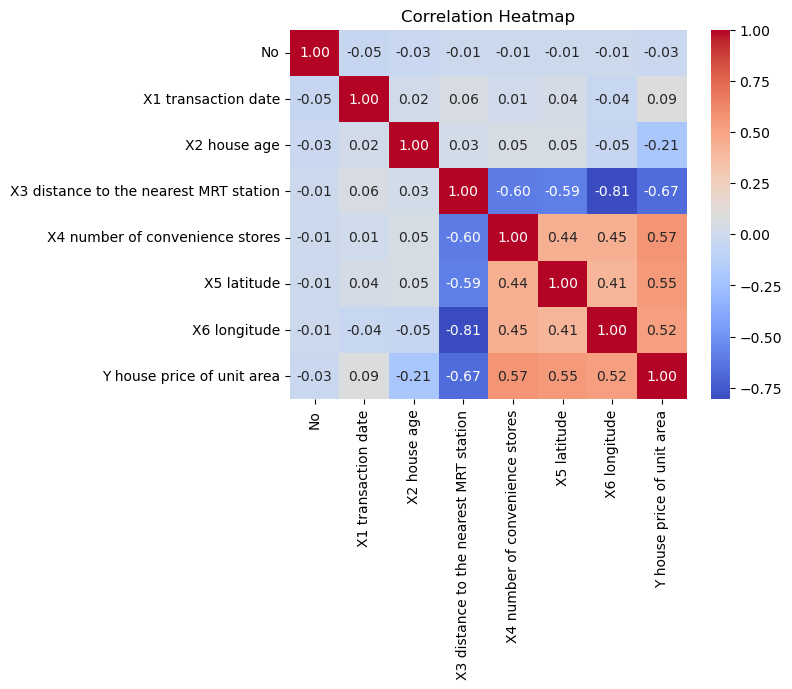

In [25]:
# correlation analysis
correlation_matrix = data.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Data Visualization

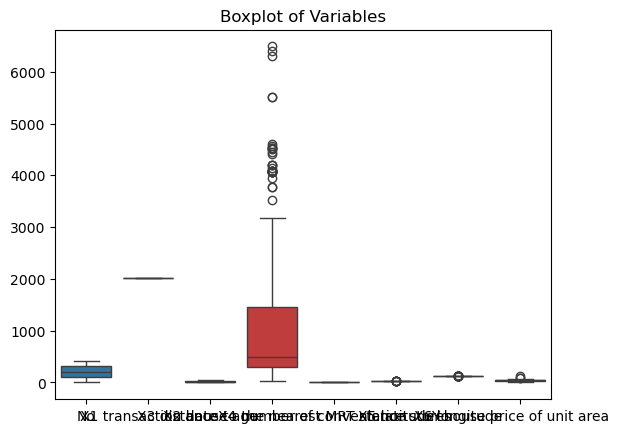

In [27]:
sns.boxplot(data=data)
plt.title("Boxplot of Variables")
plt.show()

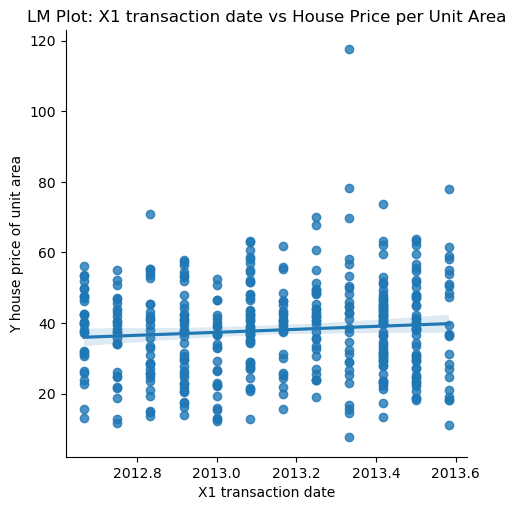

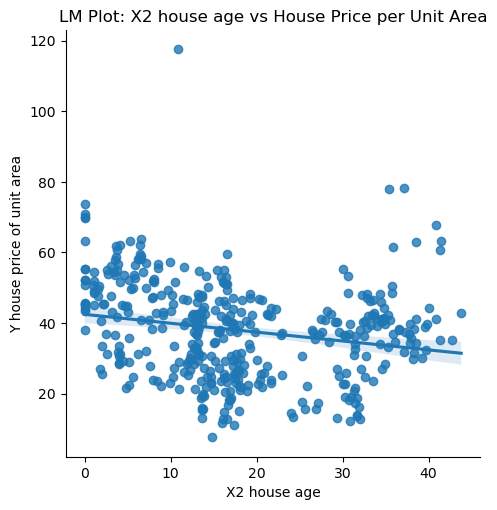

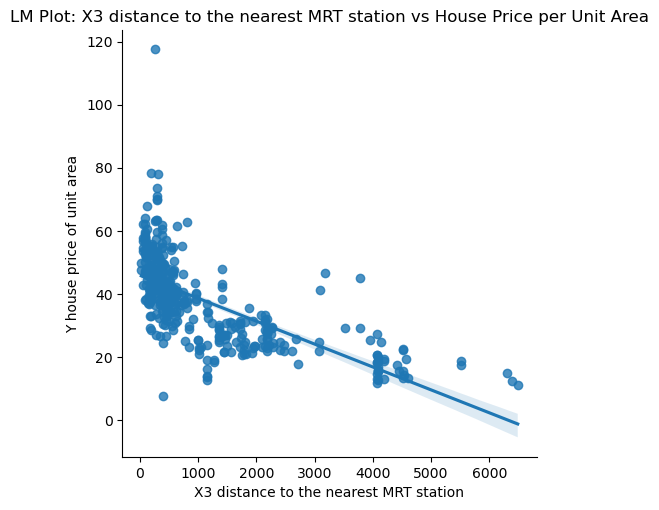

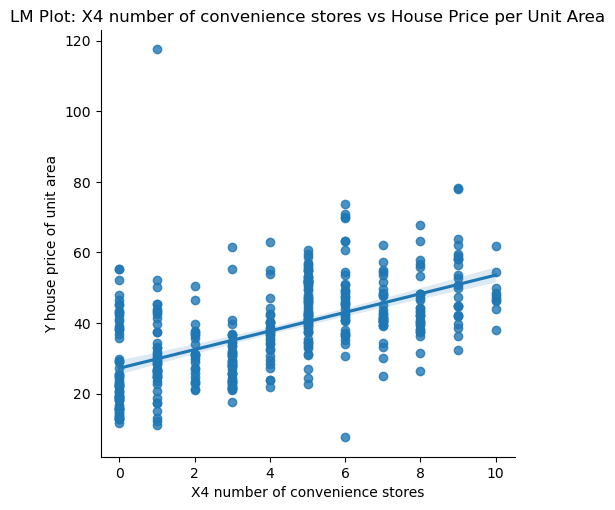

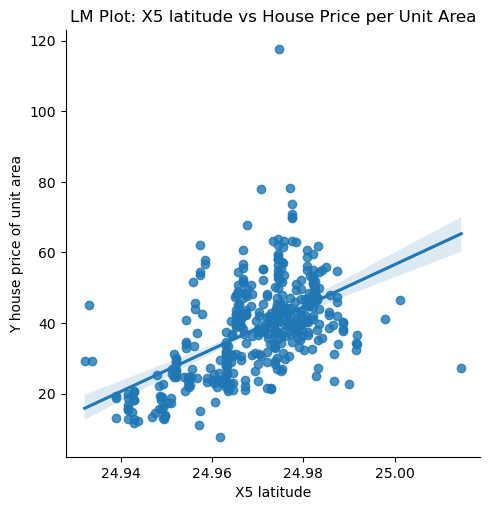

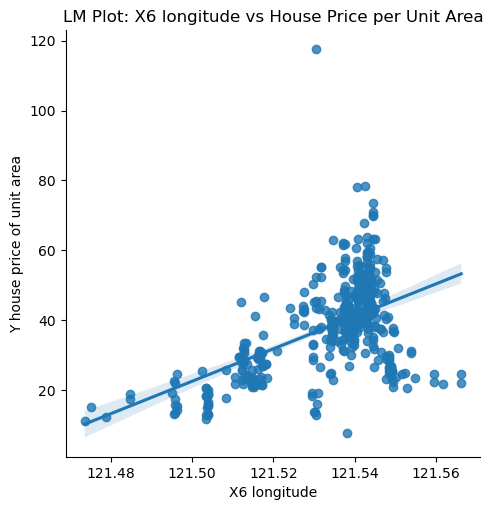

In [28]:
features = ['X1 transaction date','X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

for i, feature in enumerate(features, 1):
    sns.lmplot(x=feature, y='Y house price of unit area', data=data)
    plt.title(f"LM Plot: {feature} vs House Price per Unit Area")
plt.show()

### Spliting the Data into Input(X) & Target(Y) variables

In [30]:
X = data[['X2 house age', 'X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
Y = data['Y house price of unit area']

### Scaling - Normalization (Min-Max Scaling)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) 

### Spliting data into test data & train data

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=12)

### Linear Regression Modeling

In [65]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Predictions

In [67]:
y_pred=lr.predict(x_test)
y_pred

array([28.09153286, 49.59285609, 48.35516068, 41.57606363, 39.10303179,
       49.15088824, 48.22364842, 40.95331011, 34.99453619, 42.6266765 ,
       30.78287628, 31.5404468 , 30.83632197, 47.23145455, 51.86454036,
       44.94888807, 24.8332903 , 41.77311062, 39.71175103, 46.02393166,
       39.65776633, 46.57522247, 38.69887351, 15.47063559, 50.58230986,
       46.92630932, 31.63825224, 43.61030088, 35.81433456, 44.4671293 ,
       43.96999286, 40.75427369, 48.21519354, 13.99823373, 39.78957749,
       14.64222737, 14.69567306, 39.50673117, 33.31495307, 47.43676918,
       51.81109466, 48.45999895, 38.34070325, 36.05090814, 45.51567829,
       41.9162892 , 41.88956636, 29.99486875, 38.35571115, 45.48895544,
       43.97322342, 33.63516237, 42.75102646, 49.16353377, 34.98325883,
       33.53576435, 50.88472642, 44.13677164, 44.9469238 , 46.30889306,
       15.05361884, 49.16353377, 42.19734767, 34.99453619, 48.38398549,
       29.75980143, 40.74169083, 46.57522247, 30.3894679 , 40.96

### Model Coefficients and Intercept

In [69]:
print("Coefficient:",lr.coef_) #m
print("Intercept:",lr.intercept_) #C
# Y=mX+C

Coefficient: [-11.70460642 -26.77089304   9.9478072   23.16164772  -0.5667538 ]
Intercept: 33.436465887380876


### Visualization of Actual & Predicted Values

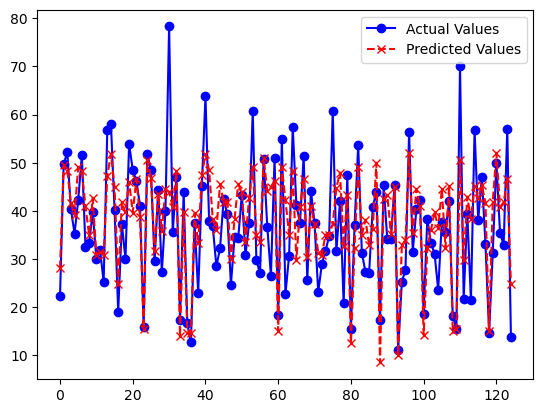

In [71]:
# Plotting actual values (y_test) with a line (blue)
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Values', linestyle='-', marker='o')

# Plotting predicted values (y_pred) with a line (red)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Values', linestyle='--', marker='x')
plt.legend()

### Performance Metrics for Regression Models: MAE, MSE, and RMSE

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

5.856834310786485
60.8321687976743
7.7994979836957645


### Creating DataFrame to view Results

In [75]:
Results=pd.DataFrame(columns=['Actual_price','Predicted_price'])
Results['Actual_price']=y_test
Results['Predicted_price']=y_pred
Results=Results.reset_index()
Results.head()

,index,Actual_price,Predicted_price
0,407,22.3,28.091533
1,275,49.7,49.592856
2,210,52.2,48.355161
3,6,40.3,41.576064
4,392,35.3,39.103032


### r2 value calculations

In [77]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.6333078316913539

In [78]:
#END